In [1]:
# !sudo apt install lrslib
# !pip install -e git+https://github.com/Pitt-JonesLab/mirror-gates#egg=mirror-gates[core]
# !pip install pylatexenc

<a href="https://colab.research.google.com/github/evmckinney9/foobar/blob/main/mirage_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from qiskit.transpiler import CouplingMap

coupling_map = CouplingMap.from_line(4)

Loading qft_n4 from QASMBench


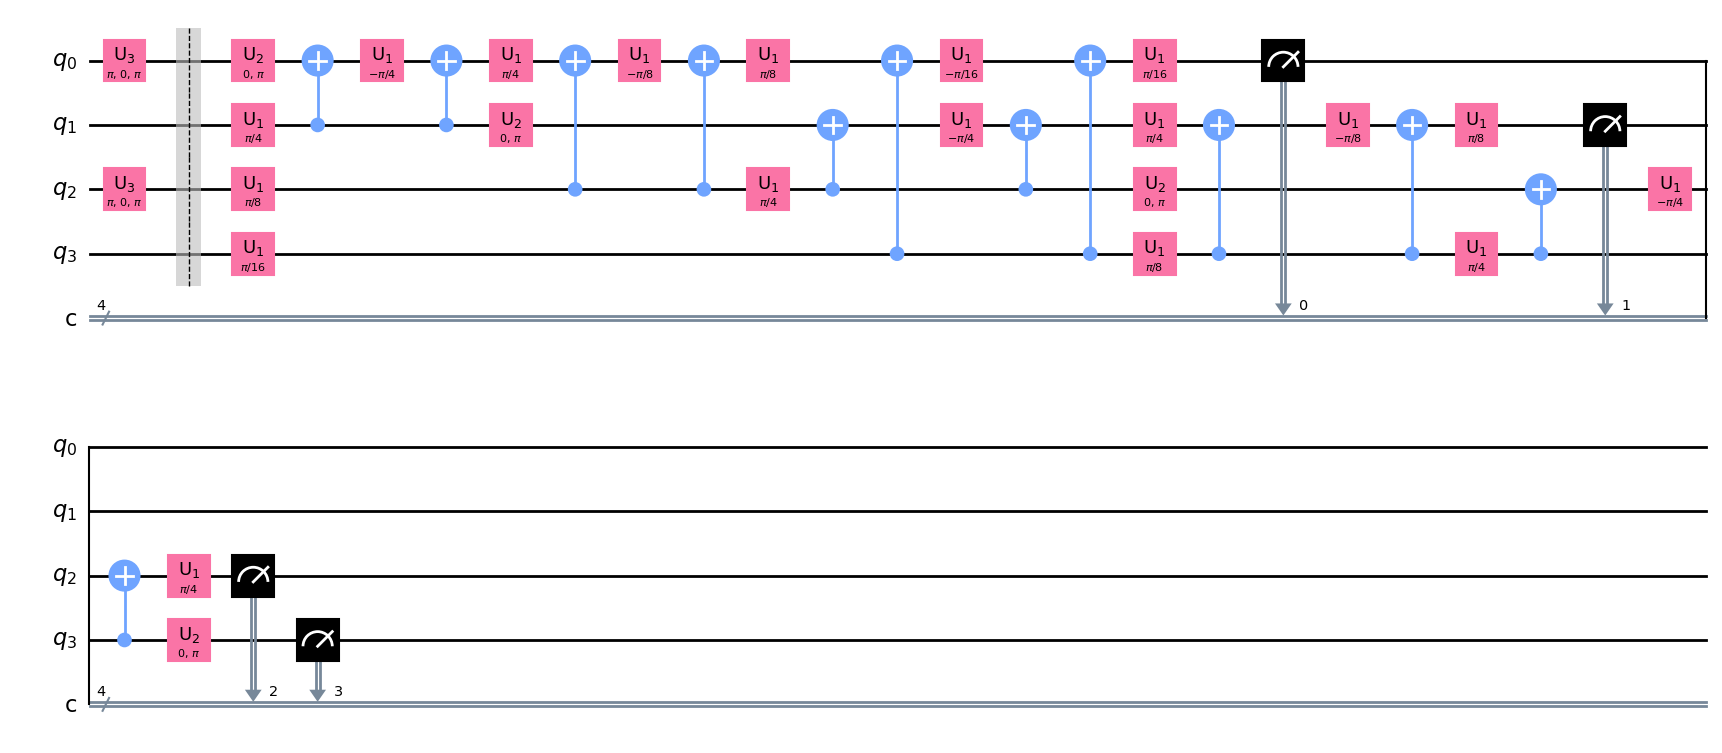

In [5]:
from transpile_benchy.library import CircuitLibrary

lib = CircuitLibrary(circuit_list=[])
qc = lib.get_circuit("qft_n4")
qc = qc.decompose()
display(qc.draw("mpl"))

In [6]:
from mirror_gates.pass_managers import Mirage

mirage = Mirage(
    coupling_map,  # coupling map
    name="Mirage-$\sqrt{\texttt{iSWAP}}$",  # transpile_benchy and figure labels)
    parallel=True,  # run trials in parallel or serial
    cx_basis=False,  # turning on sets CNOT as the basis gate,
    # (can take arbitrary basis but parameters are not configured that way yet)
    cost_function="depth",  # switch to "basic" for counting SWAPs
    fixed_aggression=None,  # force aggression level on all iterations
    layout_trials=None,  # how many independent layout trials to run (20)
    fb_iters=None,  # how many forward-backward iterations to run (4)
    swap_trials=None,  # how many independent routing trials to run (20)
    no_vf2=False,  # keep False to use VF2 for finding complete layouts
    logger=None,  # from logging moduel
)
mirage_qc = mirage.run(circuit=qc)

Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 1.00	 | xx_plus_yy(-1.57080)
 50.00% =    1/2    	 | 2.00	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)
100.00% =    1/1    	 | 3.00	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)


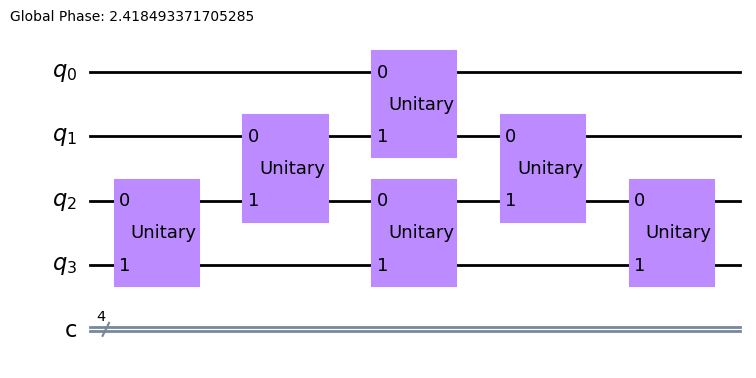

In [7]:
mirage_qc.draw("mpl")

In [ ]:
# from qiskit import transpile
# from mirror_gates import sqiswap_equiv

# mirage_qc = transpile(
#     qc,
#     optimization_level=3,
#     coupling_map=coupling_map,
#     basis_gates=["u", "xx_plus_yy", "id"],
#     routing_method="mirage",
#     layout_method="sabre_layout_v2",
# )

In [ ]:
# mirage_qc.draw("mpl")